In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['tags']

In [3]:
# Display the DataFrame
print(df.head())

                                               judul  \
0  Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...   
1           Cara Pindah Faskes BPJS Kesehatan Online   
2  Dirut BPJS: Dokter Asing Boleh Layani Pasien B...   
3  Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...   
4  Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...   

                                                tags  \
0  BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...   
1  Cara Pindah Faskes BPJS Kesehatan Online, Cara...   
2          dokter asing, BPJS Kesehatan, pasien BPJS   
3  pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...   
4   kesehatan, BPJS Kesehatan, BPJS, layanan, faskes   

                                                link  \
0  https://www.kompas.com/tren/read/2024/09/03/08...   
1  https://nasional.kompas.com/read/2024/07/13/05...   
2  https://nasional.kompas.com/read/2024/05/27/16...   
3  https://kilasbadannegara.kompas.com/bpjs-keten...   
4  https://kilasbadannegara.kompas.com/bpjs-ke

In [4]:
# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Use read_excel for .xlsx files

In [5]:
df

,judul,tags,link,text_berita,tanggal,portal_berita,text_berita_clean
0,"Tak Mampu Bayar Iuran, Bisakah Menonaktifkan B...","BPJS Kesehatan, BPJS Kesehatan PBI, bpjs keseh...",https://www.kompas.com/tren/read/2024/09/03/08...,\nKOMPAS.com - Peserta program Jaminan Kesehat...,03-09-2024,Kompas,serta program jamin sehat nasional jkn bayar i...
1,Cara Pindah Faskes BPJS Kesehatan Online,"Cara Pindah Faskes BPJS Kesehatan Online, Cara...",https://nasional.kompas.com/read/2024/07/13/05...,\n\nKOMPAS.com - Memindahkan fasilitas kesehat...,07-13-2024,Kompas,pindah fasilitas sehat faskes badan selenggara...
2,Dirut BPJS: Dokter Asing Boleh Layani Pasien B...,"dokter asing, BPJS Kesehatan, pasien BPJS",https://nasional.kompas.com/read/2024/05/27/16...,"\n\nJAKARTA, KOMPAS.com - Direktur Utama BPJS ...",05-27-2024,Kompas,jakarta direktur utama bpjs sehat ali ghufron ...
3,"Sejahterakan Pekerja, BPJS Ketenagakerjaan Kuc...","pekerja, BPJS Ketenagakerjaan, rumah, MLT BPJS...",https://kilasbadannegara.kompas.com/bpjs-keten...,\n\nKOMPAS.com - Direktur Pelayanan Badan Pen...,12-16-2023,Kompas,direktur layan badan selenggara jamin sosial b...
4,"Tingkatkan Kualitas Layanan Faskes, BPJS Keseh...","kesehatan, BPJS Kesehatan, BPJS, layanan, faskes",https://kilasbadannegara.kompas.com/bpjs-keseh...,\nKOMPAS.com  Deputi Direksi Bidang Jaminan ...,12-16-2020,Kompas,deputi direksi bidang jamin biaya layan primer...
...,...,...,...,...,...,...,...
5030,Rekam Jejak Kenaikan Iuran BPJS Kesehatan Zama...,"bpjs kesehatan, bpjs",https://www.cnbcindonesia.com/news/20201221175...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",12-21-2020,cnbc,jakarta cnbc indonesia perintah resmi naik iur...
5031,"Transparansi, BPJS Kesehatan Luncurkan Data Sa...","bpjs kesehatan, jkn-kis",https://www.cnbcindonesia.com/news/20201221193...,"Jakarta, CNBC Indonesia- BPJS Kesehatan kini m...",12-21-2020,cnbc,jakarta cnbc bpjs sehat sedia data sampel waki...
5032,"Catat, Perjalanan Kenaikan Iuran BPJS Kesehata...","bpjs kesehatan, bpjs, iuran bpjs",https://www.cnbcindonesia.com/news/20201221120...,"Jakarta, CNBC Indonesia - Pemerintah secara re...",12-21-2020,cnbc,jakarta cnbc indonesia perintah resmi naik iur...
5033,"Catat! Jokowi Janji Vaksin Gratis Warga RI, Ta...","jokowi, vaksin corona ri gratis, vaksin, bnpb2020",https://www.cnbcindonesia.com/news/20201219114...,"Jakarta, CNBC Indonesia - Pekan ini kabar baik...",12-19-2020,cnbc,jakarta cnbc indonesia pekan kabar negeri pres...


TF-IDF Clustering Performance:
Silhouette Score: 0.19867009718240702
Calinski-Harabasz Score: 646.4165604171059
Davies-Bouldin Score: 1.9202422950425382
Bag of Words Clustering Performance:
Silhouette Score: 0.20828395501925248
Calinski-Harabasz Score: 991.5005888113957
Davies-Bouldin Score: 1.920014626874406
Cosine Similarity Clustering Performance:
Silhouette Score: 0.5648240385794455
Calinski-Harabasz Score: 7622.726385589926
Davies-Bouldin Score: 0.9386742045447581


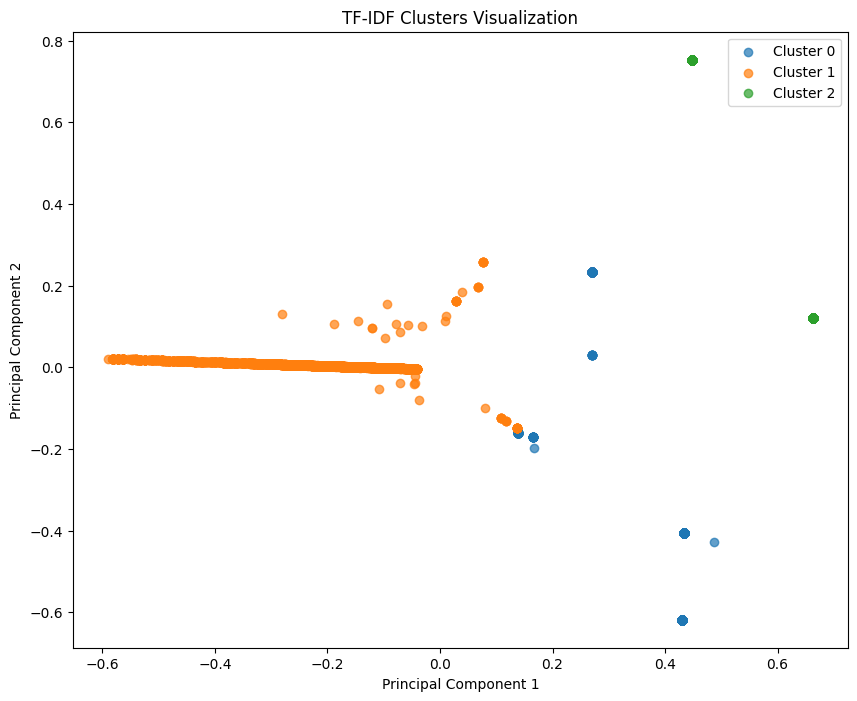

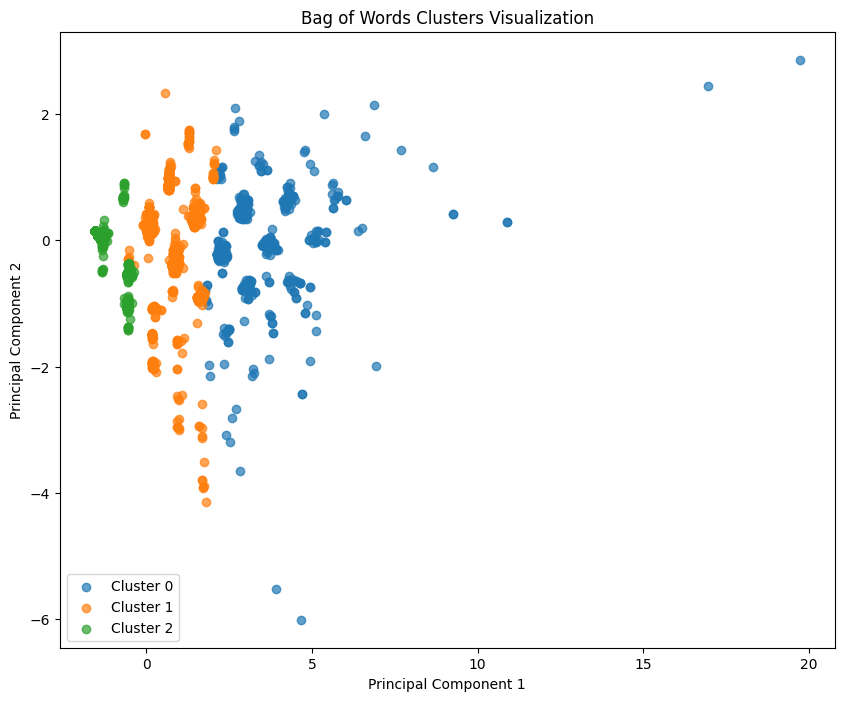

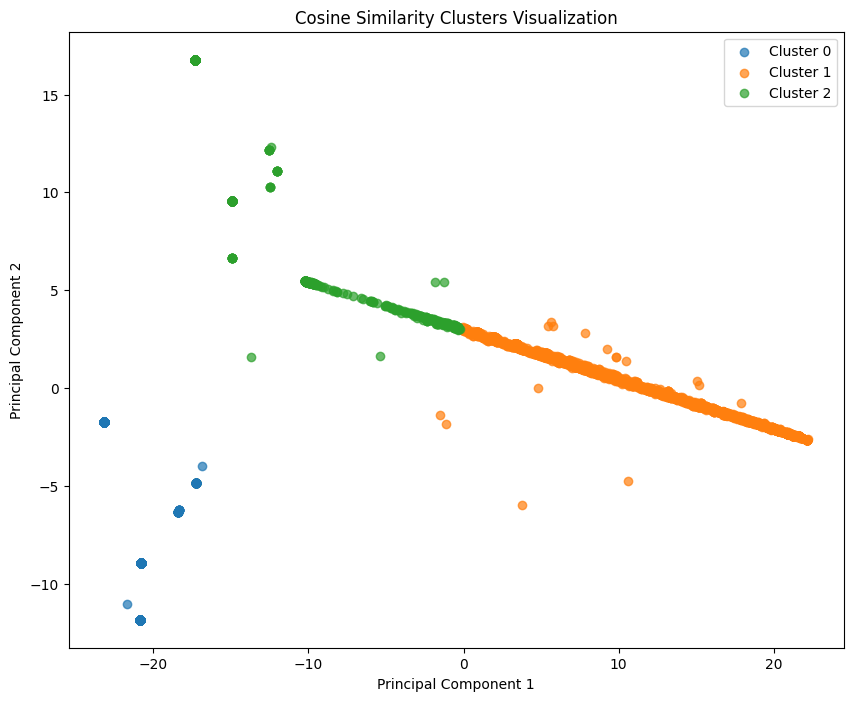

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['tags'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

TF-IDF Clustering Performance:
Silhouette Score: 0.2460606118186936
Calinski-Harabasz Score: 560.6988447513679
Davies-Bouldin Score: 2.0002917604946626
Bag of Words Clustering Performance:
Silhouette Score: 0.1264042866650113
Calinski-Harabasz Score: 617.9603642107116
Davies-Bouldin Score: 2.237187117195856
Cosine Similarity Clustering Performance:
Silhouette Score: 0.5560632953358072
Calinski-Harabasz Score: 8482.772577006906
Davies-Bouldin Score: 0.6344330253287532


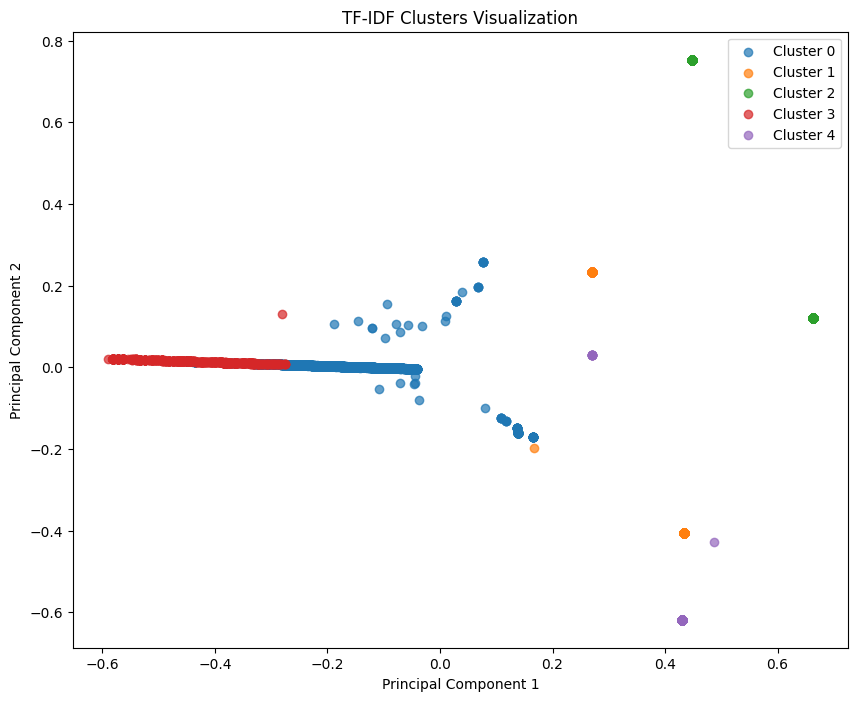

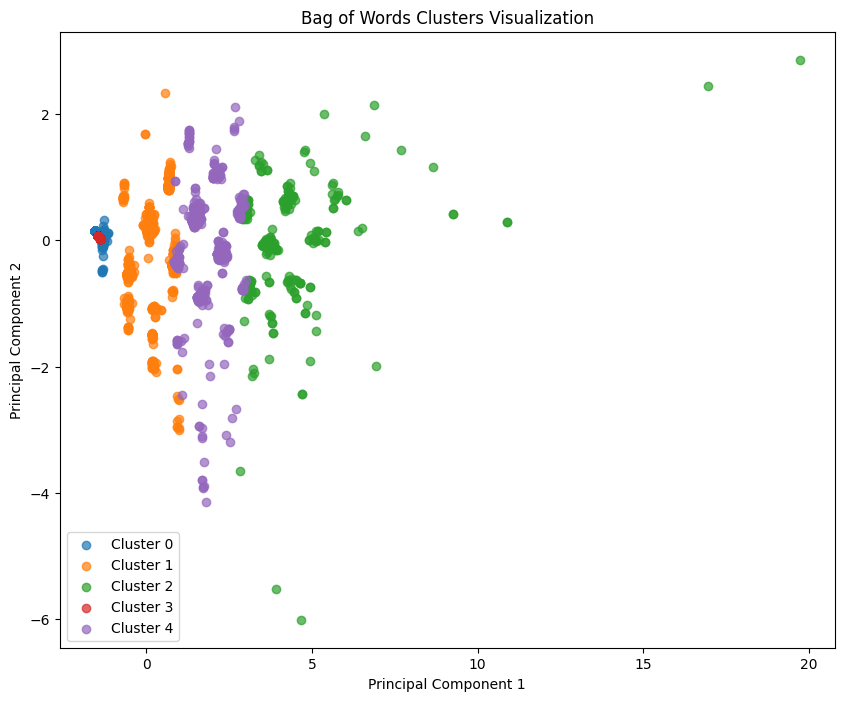

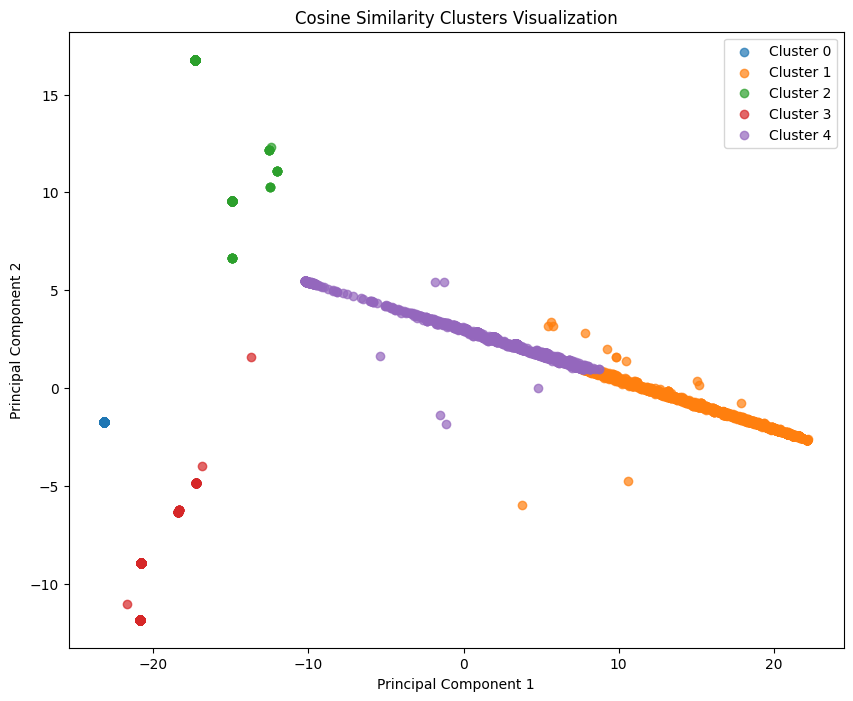

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['tags'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
num_clusters = 5  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=2).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Import Libraries

This block imports all the necessary libraries required for data manipulation, clustering, evaluation, and visualization



In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter

# 2. Load the Dataset

This block loads the dataset from an Excel file and prepares the relevant text data for processing.

In [9]:
# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['tags'].dropna()  # Drop any NaN values

# 3. Define Clustering and Evaluation Functions

This block defines functions to perform clustering using KMeans and evaluate the clustering performance based on various metrics.

In [18]:
# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

def get_top_terms(vectorizer, kmeans_model, n_terms=10):
    """Get the top n terms for each cluster."""
    terms = vectorizer.get_feature_names_out()  # Mendapatkan istilah dari vektorizer
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]  # Mengurutkan pusat cluster

    top_terms = {}
    for i in range(len(order_centroids)):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :n_terms] if ind < len(terms)]  # Memastikan indeks tidak keluar batas

    return top_terms


# Function to count documents in each cluster
def count_documents_per_cluster(cluster_labels):
    return Counter(cluster_labels)

# 4. Determine Optimal Number of Clusters with Silhoutte Score (TFIDF Only)
This block uses the Elbow Method or Silhouette Score analysis to help determine the optimal number of clusters with Silhoutte Score

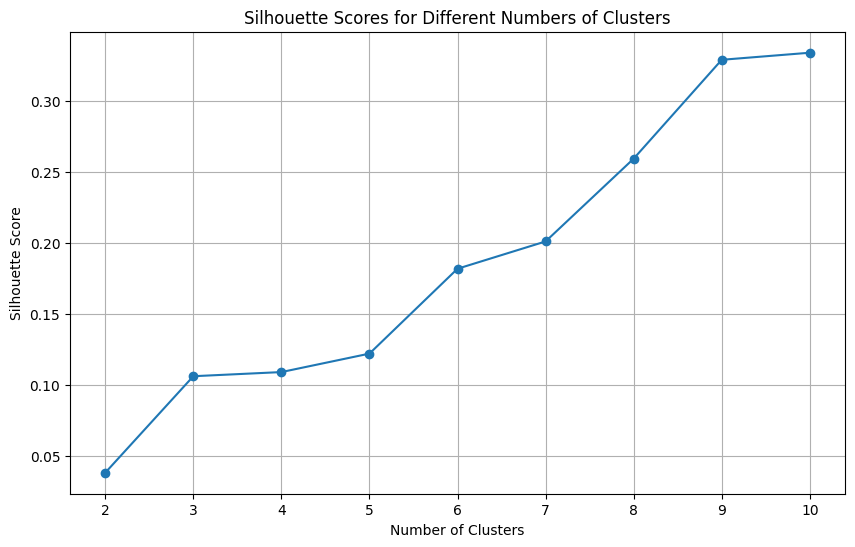

In [19]:
# Determine optimal number of clusters using Elbow Method or Silhouette Score
def find_optimal_clusters(X):
    silhouette_scores = []
    K_range = range(2, 11)  # Test for clusters from 2 to 10

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(K_range)
    plt.grid()
    plt.show()

# Call this function with TF-IDF matrix to find optimal clusters
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
find_optimal_clusters(X_tfidf)  # This will plot the silhouette scores for different cluster numbers

# 5. TF-IDF Vectorization and Clustering

This block performs TF-IDF vectorization on the documents and applies KMeans clustering.

In [20]:
# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)
num_clusters = 3  # Set the number of clusters as needed

labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# Get top terms for TF-IDF clusters
top_terms_tfidf = get_top_terms(tfidf_vectorizer, KMeans(n_clusters=num_clusters).fit(X_tfidf))
print("\nTop terms in each TF-IDF cluster:")
for i, terms in top_terms_tfidf.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each TF-IDF cluster
doc_count_tfidf = count_documents_per_cluster(labels_tfidf)
print("\nJumlah dokumen di tiap TF-IDF cluster:")
for label, count in doc_count_tfidf.items():
    print(f"Cluster {label}: {count} instances")

TF-IDF Clustering Performance:
Silhouette Score: 0.19867009718240702
Calinski-Harabasz Score: 646.4165604171059
Davies-Bouldin Score: 1.9202422950425382

Top terms in each TF-IDF cluster:
Cluster 0: bisnis, ragam, health, hanifa, hapus, harbuwono, harga, hari, harian, haroen
Cluster 1: berita, keuangan, makro, ragam, bisnis, corporate, action, health, kampus, zulhas
Cluster 2: bpjs, kesehatan, jkn, iuran, kis, kelas, ketenagakerjaan, kris, standar, penyakit

Jumlah dokumen di tiap TF-IDF cluster:
Cluster 1: 3278 instances
Cluster 0: 927 instances
Cluster 2: 769 instances


# 6. Bag of Words (BoW) Vectorization and Clustering

This block performs Bag of Words vectorization on the documents and applies KMeans clustering.

In [21]:
# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# Get top terms for BoW clusters
top_terms_bow = get_top_terms(bow_vectorizer, KMeans(n_clusters=num_clusters).fit(X_bow))
print("\nTop terms in each BoW cluster:")
for i, terms in top_terms_bow.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each BoW cluster
doc_count_bow = count_documents_per_cluster(labels_bow)
print("\nJumlah dokumen di tiap BoW cluster:")
for label, count in doc_count_bow.items():
    print(f"Cluster {label}: {count} instances")

Bag of Words Clustering Performance:
Silhouette Score: 0.20828395501925248
Calinski-Harabasz Score: 991.5005888113957
Davies-Bouldin Score: 1.920014626874406

Top terms in each BoW cluster:
Cluster 0: bpjs, kesehatan, jkn, ketenagakerjaan, kis, iuran, kris, kelas, sakit, rumah
Cluster 1: berita, keuangan, ragam, bisnis, makro, corporate, action, health, artikel, sponsor
Cluster 2: bpjs, kesehatan, iuran, kelas, cara, standar, ditanggung, kris, penyakit, yang

Jumlah dokumen di tiap BoW cluster:
Cluster 0: 552 instances
Cluster 1: 2092 instances
Cluster 2: 2330 instances


# 7. Cosine Similarity Clustering

This block calculates cosine similarity from the BoW representation and performs KMeans clustering.

In [24]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.5560632953358072
Calinski-Harabasz Score: 8482.772577006906
Davies-Bouldin Score: 0.6344330253287532

Top terms in each Cosine Similarity cluster:
Cluster 0: peserta, jiwa, telemedicine, barabai, jkp, jkn, jkm, teh, saldo, jazuli
Cluster 1: 
Cluster 2: profesional, travel, makassar, mahkamah, mahfud, trauma, identik, transplantasi, transformation, mahasiswa
Cluster 3: pj, sementara, sdm, sebagai, sebaran, pemutakhiran, informatif, bilier, dana, kronik
Cluster 4: 

Jumlah dokumen di tiap Cosine Similarity cluster:
Cluster 1: 2192 instances
Cluster 4: 1041 instances
Cluster 2: 532 instances
Cluster 3: 816 instances
Cluster 0: 393 instances


In [23]:
# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_tfidf)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Get top terms for Cosine clusters (using BoW vectorization)
top_terms_cosine = get_top_terms(bow_vectorizer, kmeans_cosine)
print("\nTop terms in each Cosine Similarity cluster:")
for i, terms in top_terms_cosine.items():
    print(f"Cluster {i}: {', '.join(terms)}")

# Count documents in each Cosine Similarity cluster
doc_count_cosine = count_documents_per_cluster(labels_cosine)
print("\nJumlah dokumen di tiap Cosine Similarity cluster:")
for label, count in doc_count_cosine.items():
    print(f"Cluster {label}: {count} instances")

Cosine Similarity Clustering Performance:
Silhouette Score: 0.5258435340648735
Calinski-Harabasz Score: 4346.574280473732
Davies-Bouldin Score: 0.7902137447266518

Top terms in each Cosine Similarity cluster:
Cluster 0: urusan
Cluster 1: ditelantarkan, kajian, newsdata, ditanggung, kampanye, diterapkan, bandarlampung, dengar, ditlantas, balik
Cluster 2: bodong, terapung, gratifikasi, tertahan, berhenti, tersangka, terra, berdarah, berbasis, beras
Cluster 3: 
Cluster 4: pasien, gigitan, cacar, gelombang, buruh, sendiri, rasa, gerindra, kaltim, kalteng

Jumlah dokumen di tiap Cosine Similarity cluster:
Cluster 0: 2334 instances
Cluster 3: 1039 instances
Cluster 2: 391 instances
Cluster 4: 441 instances
Cluster 1: 769 instances


# Optimal Clustering dengan KMeans + TFIDF, Bow, Cosine (WCSS Method)

Number of NaN values: 61


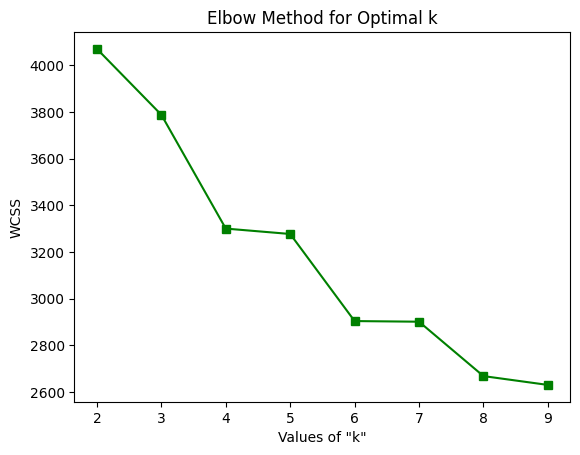

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'tags'
documents = df['tags']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_

# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Number of NaN values: 61


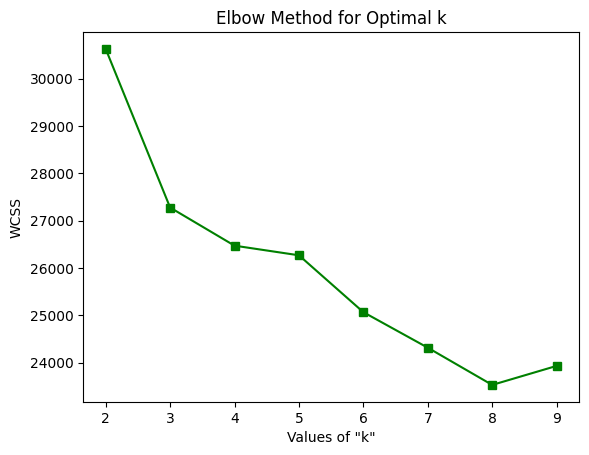

The optimal number of clusters based on silhouette score is: 2


In [46]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'tags'
documents = df['tags']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag-of-Words features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents).toarray()

# Determining the maximum number of clusters using a simple method
limit = int((X.shape[0] // 2) ** 0.5)

# Selecting the optimal value of 'k' using the elbow method
wcss = {}
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss[k] = model.inertia_


# Plotting the WCSS values to find the elbow point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Number of NaN values: 61


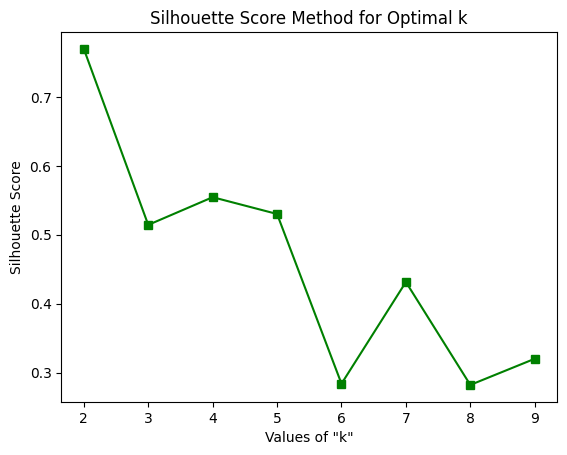

The optimal number of clusters based on silhouette score is: 2


In [45]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load the dataset
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)

# Assuming the relevant text column is named 'tags'
documents = df['tags']

# Check for NaN values in the documents
print("Number of NaN values:", documents.isnull().sum())

# Handle NaN values by dropping them or filling with an empty string
documents = documents.dropna()  # Option 1: Drop NaN values
# documents = documents.fillna('')  # Option 2: Fill NaN with an empty string

# Convert the text data to Bag of Words (BOW) features
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features if needed
X = vectorizer.fit_transform(documents)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(X)

# Determine optimal k using silhouette score
limit = int((X.shape[0] // 2) ** 0.5)
silhouette_scores = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(cosine_sim)
    silhouette_avg = silhouette_score(cosine_sim, labels, metric="cosine")
    silhouette_scores.append((k, silhouette_avg))

# Extracting the optimal k value based on the maximum silhouette score
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]

# Plotting silhouette scores to find the optimal number of clusters
plt.plot([k for k, _ in silhouette_scores], [score for _, score in silhouette_scores], 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")


# 8. Visualization of Clusters Based On WCSS Method

This block visualizes the clusters formed by TF-IDF, BoW, and cosine similarity using PCA.

TF-IDF Clustering Performance:
Silhouette Score: 0.2460606118186936
Calinski-Harabasz Score: 560.6988447513679
Davies-Bouldin Score: 2.0002917604946626
Bag of Words Clustering Performance:
Silhouette Score: 0.1264042866650113
Calinski-Harabasz Score: 617.9603642107116
Davies-Bouldin Score: 2.237187117195856
Cosine Similarity Clustering Performance:
Silhouette Score: 0.5560632953358072
Calinski-Harabasz Score: 8482.772577006906
Davies-Bouldin Score: 0.6344330253287532


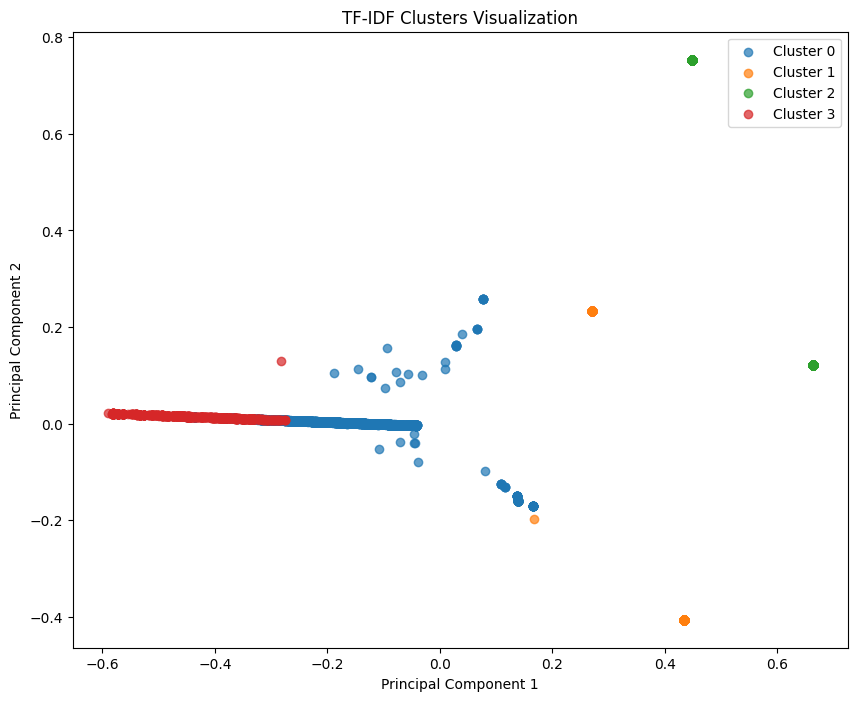

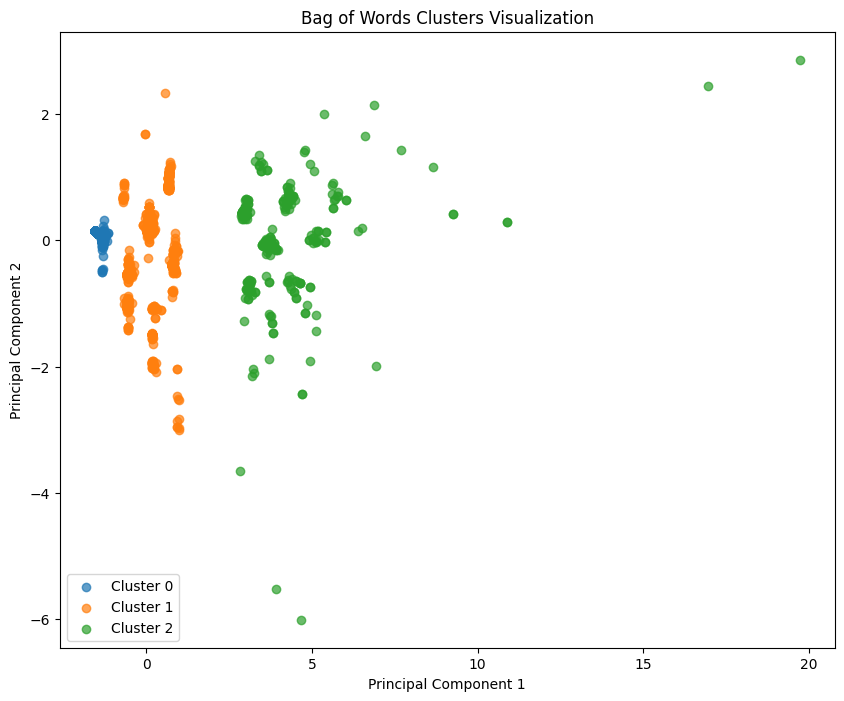

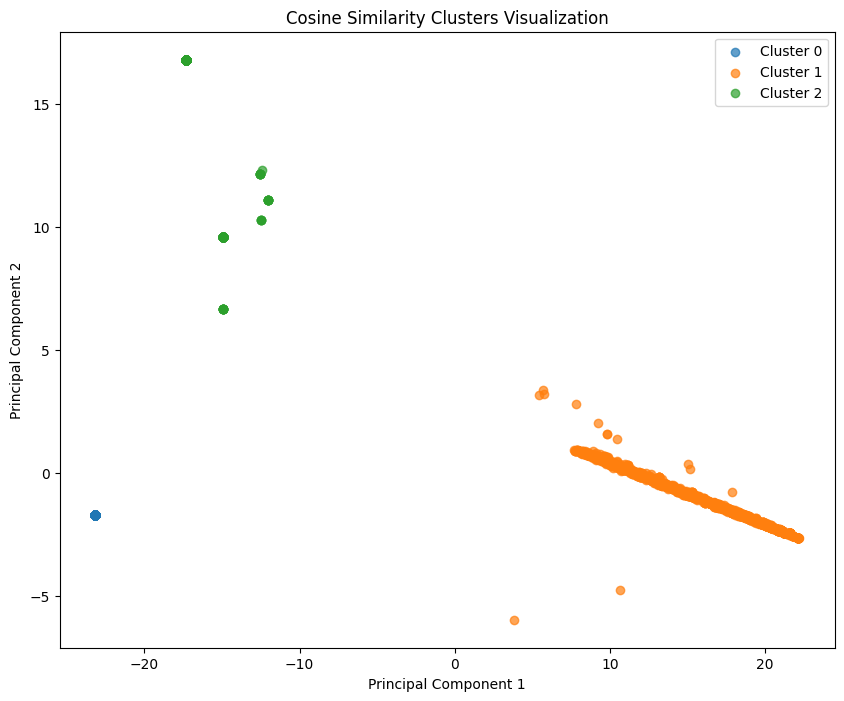

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (use read_excel for .xlsx files)
file_path = '/content/data_ready_final.xlsx'
df = pd.read_excel(file_path)  # Correctly load Excel files

# Assuming the relevant text column is named 'text_berita_clean'
documents = df['tags'].dropna()  # Drop any NaN values

# Function to perform clustering and evaluation
def perform_clustering(X, num_clusters):
    # Perform clustering using KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X)

    # Get cluster labels for each document
    cluster_labels = kmeans.labels_

    # Evaluate clustering using Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    CH = calinski_harabasz_score(X.toarray(), cluster_labels)
    DB = davies_bouldin_score(X.toarray(), cluster_labels)

    return cluster_labels, silhouette_avg, CH, DB

# 1. TF-IDF Vectorization and Clustering
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)


labels_tfidf, silhouette_tfidf, CH_tfidf, DB_tfidf = perform_clustering(X_tfidf, num_clusters)

print(f'TF-IDF Clustering Performance:\nSilhouette Score: {silhouette_tfidf}\nCalinski-Harabasz Score: {CH_tfidf}\nDavies-Bouldin Score: {DB_tfidf}')

# 2. Bag of Words (BoW) Vectorization and Clustering
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

labels_bow, silhouette_bow, CH_bow, DB_bow = perform_clustering(X_bow, num_clusters)

print(f'Bag of Words Clustering Performance:\nSilhouette Score: {silhouette_bow}\nCalinski-Harabasz Score: {CH_bow}\nDavies-Bouldin Score: {DB_bow}')

# 3. Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(X_bow)

# Perform KMeans clustering on the cosine similarity matrix
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels_cosine = kmeans_cosine.fit_predict(cosine_sim_matrix)

# Evaluate performance for Cosine Similarity
silhouette_cosine = silhouette_score(cosine_sim_matrix, labels_cosine)
CH_cosine = calinski_harabasz_score(cosine_sim_matrix, labels_cosine)
DB_cosine = davies_bouldin_score(cosine_sim_matrix, labels_cosine)

print(f'Cosine Similarity Clustering Performance:\nSilhouette Score: {silhouette_cosine}\nCalinski-Harabasz Score: {CH_cosine}\nDavies-Bouldin Score: {DB_cosine}')

# Visualize clusters using PCA (for TF-IDF)
pca_tfidf = PCA(n_components=2).fit_transform(X_tfidf.toarray())
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.scatter(pca_tfidf[labels_tfidf == i][:, 0], pca_tfidf[labels_tfidf == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('TF-IDF Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for BoW)
pca_bow = PCA(n_components=3).fit_transform(X_bow.toarray())
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_bow[labels_bow == i][:, 0], pca_bow[labels_bow == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Bag of Words Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clusters using PCA (for Cosine Similarity)
pca_cosine = PCA(n_components=2).fit_transform(cosine_sim_matrix)
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(pca_cosine[labels_cosine == i][:, 0], pca_cosine[labels_cosine == i][:, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Cosine Similarity Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()